### Sistemas de ecuaciones diferencial
- Herrera Monteza Jherson Miguel

In [217]:
#Importamos las librerias
from matplotlib import pyplot as plt #Libreria para graficar, muy similar al matlab
import numpy as np # Libreria para trabajar con matrices y algunas expresiones matematicas
import pandas as pd # Libreria para trabajar con dataframes
import scipy as sp # Libreria para trabajar con funciones matematicas
from matplotlib import style # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) # Estilo de graficos

In [218]:
# Condiciones iniciales
xo = 5
y0 = 0
dt = 0.1
tiempo = np.arange(0, 18+dt, dt)

In [219]:
x = [xo]
y = [y0]

In [220]:
def funcion_f(x, y, t):
    u = y
    v = -x + np.cos(t)
    return u, v # Retorna los valores

In [221]:
for i in range(len(tiempo)):
    x_derivada, y_derivada = funcion_f(x[i], y[i], tiempo[i])
    x.append(x[i]+x_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista
    y.append(y[i]+y_derivada*dt)
    
print(len(x))

182


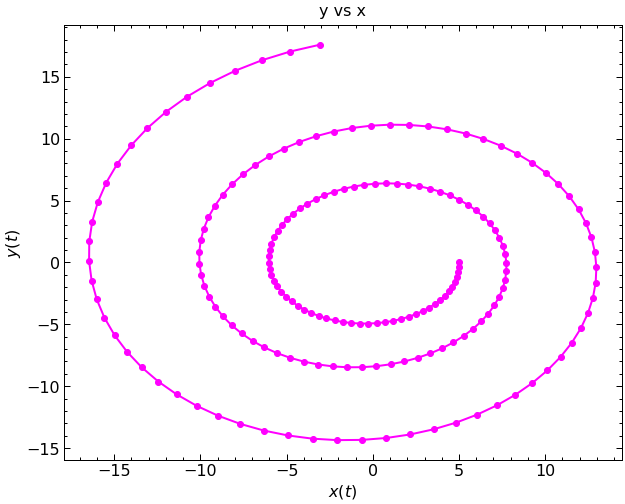

In [223]:
ax = plt.figure(figsize=(10,8))
plt.title('y vs x', pad = 10)
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$x(t)$')
plt.plot(x, y, 'o-', color = 'magenta')


Text(0.5, 0, '$t\\ [s]$')

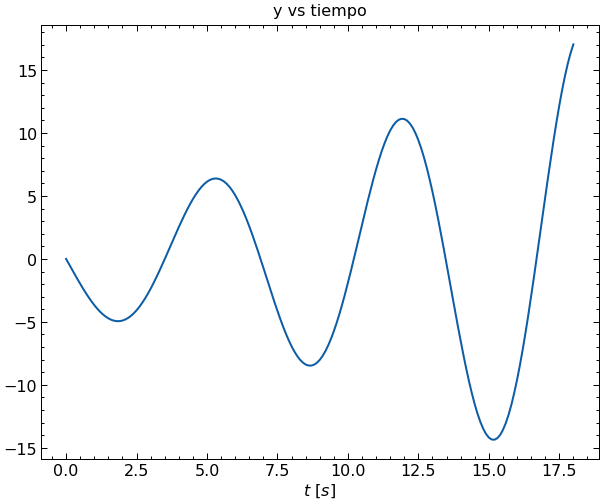

In [224]:
ay = plt.figure(figsize=(10,8))
plt.title('y vs tiempo', pad = 10)
plt.plot(tiempo, y[:len(tiempo)], '-')
plt.xlabel(r'$t\ [s]$')

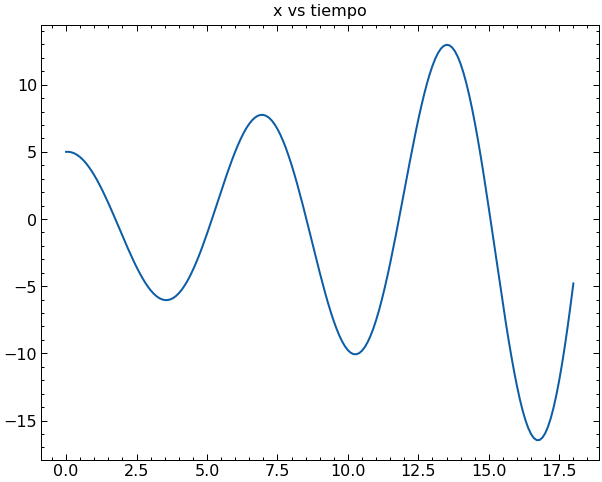

In [225]:
aex = plt.figure(figsize=(10,8))
plt.title('x vs tiempo', pad = 10)
plt.plot(tiempo, x[:len(tiempo)], '-')

### Atractor de Lorenz
El famoso *sistema de Lorenz* de ecuaciones diferenciales está dado por:

\begin{equation} 
\begin{split}
\frac{dx}{dt} & = - \sigma x + \sigma y \\
\frac{dy}{dt} & = \rho x - y - xz \\
\frac{dz}{dt} & = -\beta z + xy
\end{split}
\end{equation}


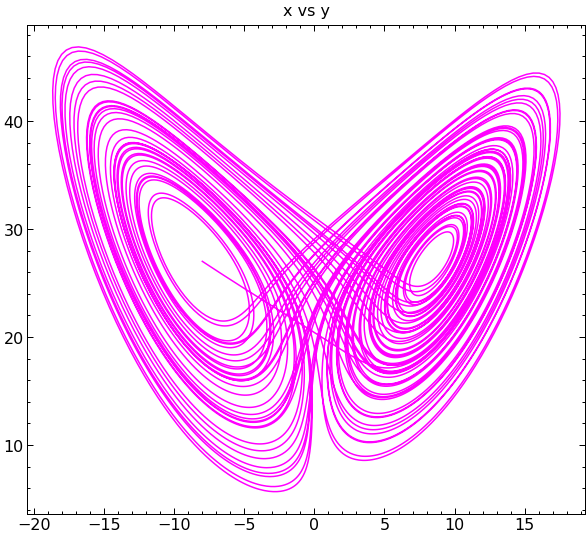

In [252]:
# Definimos los parámetros de la ecuación
sigma = 10     # Valor de sigma
rho   = 28     # Valor de rho
beta  = 8./3.  # Valor de beta
# Función que devuelve un punto del sistema de ecuaciones diferenciales toma como argumentos los valores de x, y, z 
# y devuelve un punto del sistema, correpondiente a dx/dt, dy/dt, dz/dt, representados con u, v y w
def lorenz(x, y, z):
    u = -sigma*x+sigma*y
    v = rho*x-y-x*z
    w = -beta*z+x*y
    return u, v, w
# Condiciones iniciales o punto de partida
xo = -8
yo = 8
zo = 27
# Se crea tres listas para guardar todos los valores de la solución aproximada del sistema
# su valor inicial es el punto de partida
xs = [xo]
ys = [yo]
zs = [zo]
# Se crea una paso de tiempo dt y yna lista para guardar todos los valores de tiempo
dt = 0.005
tiempo = np.arange(0,60+dt,dt)
# Bucle para ir llenando las soluciones de x, y, z, utilizando el método de Euler
for i in range(len(tiempo)):
    x_derivada, y_derivada, z_derivada = lorenz(xs[i], ys[i], zs[i]) # Se evalua la función de Lorenz en cada iteración
    xs.append(xs[i]+x_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista xs
    ys.append(ys[i]+y_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista ys
    zs.append(zs[i]+z_derivada*dt) # Se usa el método de Euler para agregar cada valor a la lista zs
    
# Graficamos las listas obtenidas    
ax = plt.figure(figsize=(10,9))
plt.plot(xs, zs , '-', linewidth = 1.5, color = 'magenta')
plt.title('x vs y', pad = 10)
plt.savefig('x_vs_y.eps')